# Getting ready for class


Before class starts, please:



- Visit https://bit.ly/firas-lecture and
- Click the link in the README to get the lecture notes for today

In [42]:
# Import the libraries 

import pandas as pd
import numpy as np
from IPython.display import IFrame

import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data
mtcars = data.cars()


q1 = 'https://app.sli.do/event/0nwvmaj5/embed/polls/5cff1bff-b850-4647-b2fd-c799dbd16b78'
q2 = 'https://app.sli.do/event/0nwvmaj5/embed/polls/e3282762-367b-40c7-a9cc-c76f9f8db849'

## Learning Context


<center>
<img src="https://www.caveolearning.com/hs-fs/hubfs/images/Blog_Images/Learner%20Persona%20blog.jpg?width=369&name=Learner%20Persona%20blog.jpg" width=50%>
</center>

Image Source: [Caveo Learning](https://www.caveolearning.com/blog/developing-empathy-and-understanding-through-learner-personas)

## Learning Context


- **Academic year**: Block 2 of MDS-V
    - Block 1: Platforms, Programming, Wrangling
    - ~ 120 students in the class

- **Programming**: Varied
     - Least experienced: 1-2 months in python and R 
     - Most experienced:  Worked in software industry for 2+ years 

- **Prior knowledge**: Most have strong preferences
    - Python: Matplotlib and/or Seaborn
    - R: baseR and/or ggplot


- **Motivation**: 
    - Most would rather be learning more about machine learning and neural networks 😅

# Altair: Declarative Visualization in Python

<div align = "right"> 
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    March 13, 2020 <br>
    Firas Moosvi
</div>

## Learning Objectives

- Critically evaluate data visualizations

- Explain the difference between declarative and imperative syntax

- Describe the 6 components of the visualization grammar

- Construct data visualizations using Altair

- Add interactivity to Altair plots

### Starting with the punchline!

By the end of lecture today, you will learn how to make this chart:

In [ ]:
mtcars.head()

In [23]:
base = alt.Chart(mtcars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Color('Origin'),
    alt.Column('Origin')
).properties(
    width=250,
    height=250
)

base.interactive()

alt.Chart(...)

### In matplotlib:

If you're familiar with `matplotlib`, this should illustrate to you **how** Altair is different (not better or worse, just *differently sane*).

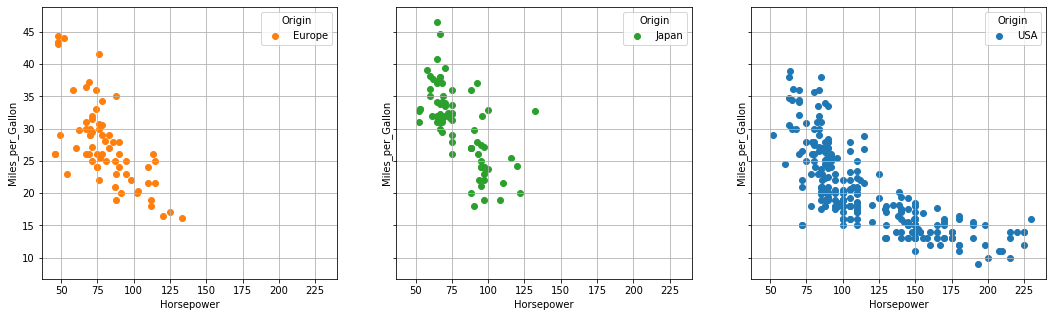

In [24]:
colour_map = dict(zip(mtcars['Origin'].unique(), ['C0','C1','C2']))
n_panels = len(colour_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 6, 5),
                       sharex = True, sharey = True)

for i, (country,group) in enumerate(mtcars.groupby('Origin')):
    ax[i].scatter(group['Horsepower'],
                  group['Miles_per_Gallon'],
                  label = country,
                  color = colour_map[country])
    ax[i].legend(title='Origin')
    ax[i].grid()
    ax[i].set_xlabel('Horsepower')
    ax[i].set_ylabel('Miles_per_Gallon')

## Part 1: Power of data visualizations

#### Case 1: Gun deaths in Florida

<div style="height: 30px;">
    
</div>

<center>
    <img src="https://i.insider.com/53038b556da8110e5ce82be7?width=700&format=jpeg&auto=webp" width=80%>
</center

In [25]:
IFrame(q1, 500, 400)

## Results!

The correct answer is: 

```
## Enter the answer here
```

### Case 2: Smartphones and wrist injuries 

<div style="height: 30px;">
    
</div>
    
<center>
<img src=imgs/case1.png width=70% align="center"/>
</center>

In [ ]:
IFrame(q2, 500, 400)

## Results!

The correct answer is: 

```
## Enter the answer here
```

## Part 2: Introduction to Altair


## Visualization Grammar

<center>
    <img src="imgs/Visualization-Grammar 1.jpeg">
<center>
    
Slides used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### Why do we need a visualization grammar?

- Imperative:

- Declative: 

In [ ]:
# Altair 

base = alt.Chart(mtcars).mark_point(size=2).encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Color('Origin'),
    alt.Column('Origin')
).properties(
    width=140,
    height=100
)

base

In [ ]:
# Matplotlib

colour_map = dict(zip(mtcars['Origin'].unique(), ['C0','C1','C2']))
n_panels = len(colour_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 6, 5),
                       sharex = True, sharey = True)

for i, (country,group) in enumerate(mtcars.groupby('Origin')):
    ax[i].scatter(group['Horsepower'],
                  group['Miles_per_Gallon'],
                  label = country,
                  color = colour_map[country])
    ax[i].legend(title='Origin')
    ax[i].grid()
    ax[i].set_xlabel('Horsepower')
    ax[i].set_ylabel('Miles_per_Gallon')

<center>
    <img src="imgs/Visualization-Grammar 8.jpeg">
</center>

<center>
    <img src="imgs/Visualization-Grammar 2.jpeg">
<center>

## 1. Tabular Data

Data in Altair is built around the [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

The fundamental object in Altair is the ``Chart``. It takes the dataframe as a single argument:

```chart = alt.Chart(DataFrame)```

Let's create a simple `DataFrame` to visualize, with a categorical data in the `Letters` column and numerical data in the `Numbers` column:

In [26]:
data = pd.DataFrame({'Letters': list('CCCDDDEEE'),
                     'Numbers': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
data.T

,0,1,2,3,4,5,6,7,8
Letters,C,C,C,D,D,D,E,E,E
Numbers,2,7,4,1,2,6,8,4,7


In [28]:
plot = alt.Chart(data)

#plot

SchemaValidationError: Invalid specification

        altair.vegalite.v4.api.Chart, validating 'required'

        'mark' is a required property
        

alt.Chart(...)

<center>
    <img src="imgs/Visualization-Grammar 3.jpeg">
<center>

## 2. Chart Marks

Next we can decide what sort of *mark* we would like to use to represent our data.

Here are some of the more commonly used `mark_*()` methods supported in Altair and Vega-Lite; for more detail see [Marks](https://altair-viz.github.io/user_guide/marks.html) in the Altair documentation:

|Mark|
|------|
|`mark_area()`|
|`mark_bar()`|
|`mark_circle()`, `mark_point`, `mark_square`|
|`mark_rect()`|
|`mark_line()`|
|`mark_rule()`|
|`mark_text()`|
|`mark_image()`|

Let's add a mark_point() to our plot:

In [31]:
plot = alt.Chart(data).mark_point()

plot

alt.Chart(...)

😒 

We got a plot now, but clearly we're being pranked: all the data points collapsed to one location!

<center>
    <img src="imgs/Visualization-Grammar 4.jpeg">
<center>

A visual encoding specifies how a given data column should be mapped onto the visual properties of the visualization.
Some of the more frequently used visual encodings are listed here:

|Encoding| What does it encode?
|--------|--------------------|
|`X`| x-axis value | 
|`Y`| y-axis value |
|`Color`| color of the mark |
|`Opacity`| transparency/opacity of the mark |
|`Shape`| shape of the mark |
|`Size`| size of the mark |
|`Row`| row within a grid of facet plots |
|`Column`| column within a grid of facet plots |

For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/user_guide/encoding.html) section of the documentation.

We need to add an encoding! So the data is mapped to the x and y axes:

In [32]:
plot = alt.Chart(data).mark_point().encode(alt.X('Numbers'))

plot

# We still haven't encoded any of the data to the Y-axis!

alt.Chart(...)

### You Try!

Encode the `Letters` column as the `y` position to make the visualization more useful.

In [33]:
plot = alt.Chart(data).mark_point().encode(alt.X('Numbers'),
                                          ## YOUR SOLUTION HERE
                                           alt.Y('Letters')
                                          )

plot

alt.Chart(...)

### You Try!

Change the `mark` from `mark_point()` to `mark_circle` or `mark_square`

In [34]:
plot = plot # YOUR SOLUTION HERE

### You Try!

What do you think will happen when you try to change the mark to a mark_bar()

In [ ]:
plot 

## YOUR SOLUTION HERE (change mark to `mark_bar`)

<center>
    <img src="imgs/Visualization-Grammar 5.jpeg">
<center>

### 4. Transforms

Though Altair supports a few built-in data transformations and aggregations, in general I **do not suggest** you use them.

Some reasons why:

- Not all functions are available
- You already know how to do complex wrangling using pandas
- No opportunity to write tests if wrangling is done within plots
- Single point of failure
- Syntax is non-trivial and not very "pythonic"
- Code is less readable and harder to document

<center>
    <img src="imgs/Visualization-Grammar 6.jpeg">
<center>

### 5. Scale

The scale parameter controls axis limits, axis types (log, ln, etc...).

For a complete description of the available options, see the [Scales and Guides](https://altair-viz.github.io/user_guide/scale_resolve.html) section of the documentation.

In [ ]:
plot = alt.Chart(data).mark_point().encode(
            alt.X('Numbers'),
            alt.Y('Letters'))

plot.encode(alt.X('Numbers', 
                  scale = alt.Scale(type='log')))

<center>
    <img src="imgs/Visualization-Grammar 7.jpeg">
<center>

### 6. Guide

The guides component deals with legends and annotations that "guide" our interpretation of the data. In most cases you will not need to work much with this component as the defaults are pretty good!

For a complete description of the available options, see the [Scales and Guides](https://altair-viz.github.io/user_guide/scale_resolve.html) section of the documentation.

## Self Assessment

### Activity: 

Fill out the table below mapping each Visualization Grammar component to the plot element

| Grammar component | Plot element | 
| ----------------- | ------------ |
| 1. Data |     `mtcars` |
| 2. Mark |     `mark_point` |
| 3. Encode |   'Horsepower' to X,<br> 'Miles_per_Gallon' to Y, <br> 'Origin' to Color AND Column |
| 4. Transform | None |
| 5. Scale |    None |
| 6. Guide |    None |



In [35]:
# Altair 

## To uncomment the code chunk below, select it
## and press Command + / (or Control + /)

# first_chart = alt.Chart('<<DATA>>').'<<MARK>>'.encode(
#     ## YOUR SOLUTION HERE
#     ## YOUR SOLUTION HERE
#     ## YOUR SOLUTION HERE
#     ## YOUR SOLUTION HERE
# )
# first_chart

### One more thing...

In [37]:
chart = alt.Chart(mtcars).mark_point(size=2).encode(
            alt.X('Horsepower'),
            alt.Y('Miles_per_Gallon'))

chart

alt.Chart(...)

## Summary and recap:

1. Power of visualizations

2. Visualization Grammar
    - 1: Data
    - 2: Marks
    - 3: Encoding
    - 4: Transformation
    - 5: Scale
    - 6: Guide

3. Introduction to Altair
    - Declarative syntax
    - Figure layouts using shorthand: & and |

## Next class ... 

In [40]:
base = (
    alt.Chart(mtcars).mark_point(size=40).encode(
        alt.X("Horsepower"),
        alt.Y("Miles_per_Gallon"),
        alt.Color("Origin"),
        alt.Column("Origin"),
    )
    .properties(width=250, height=200)
)

base

# With just a few lines of code, we can make some magic...

alt.Chart(...)

In [41]:
## New code - to be discussed next week!

brush = alt.selection(type="interval")

base = base.encode(
    color=alt.condition(brush, "Origin", alt.ColorValue("gray")),
    tooltip=["Name", "Origin", "Horsepower", "Miles_per_Gallon"],
).add_selection(brush)
base


alt.Chart(...)

### Acknowledgements

- PIMS for hosting and maintaining `syzygy`
- Altair development team
    - [Eitan Lees for his slides on the Visualization Grammar](https://speakerdeck.com/eitanlees/visualization-grammar)
    - [Jake VanderPlas](https://github.com/jakevdp) for his thousands of StackOverflow and GitHub answers related to Altair)
- MDS-V academic teaching team for their ideas and feedback


## Appendix

![](imgs/02-altair-stack.png)

[Credit: Eitan Lees](https://eitanlees.github.io/altair-stack/)

Contrary to other plotting libraries, in Altair, every dataset must be provided as either:

- a Dataframe, OR 
- a URL to a `json` or `csv` file
- GeoJSON objects (for maps)

The URL passed in, is turned into a dataframe behind the scenes. 

See [Defining Data](https://altair-viz.github.io/user_guide/data.html) in the Altair documentation for more details.

Altair is able to automatically determine the type of the variable using built-in heuristics. 

That being said, it is definitely **very GOOD practice** to specify the `encoding` explicitly.

There are four possible data types and Altair provides a useful shortcode to specify them: :

| Data Type | Description | Shortcode| 
| ----------| ----------- | ---------|
| Quantitative | Numerical quantity (real-valued) | `:Q` |
| Nominal | Names / Unordered categoricals | `:N` |
| Ordinal | Ordered categoricals | `:O` | 
| Temporal | Date/time | `:T` | 



## RISE settings 

In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "serif",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": True,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )

## Set Altair default size

def theme_fm(*args, **kwargs):
    return {'height': 300,
            'config': {'style': {'circle': {'size': 400},
                                'point': {'size': 30},
                                'square': {'size': 400},
                                },
                       'legend': {'symbolSize': 20, 'titleFontSize': 20, 'labelFontSize': 20}, 
                       'axis': {'titleFontSize': 20, 'labelFontSize': 20}},
            }

alt.themes.register('theme_fm', theme_fm)
alt.themes.enable('theme_fm')